<a href="https://colab.research.google.com/github/akash-sardar/HeartRatePrediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
Kaggle Link : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction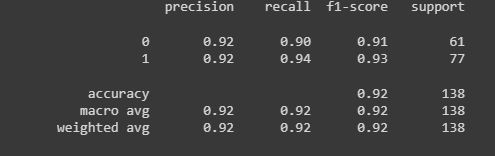

Attribute Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pyplot
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.isnull().sum() # check for NaN attribute values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [34]:
df_X = df.iloc[:,0:11]
df_X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [35]:
df_y = df.iloc[:,-1]
df_y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [39]:
from sklearn.preprocessing import MinMaxScaler

df_X = pd.get_dummies(df_X)
df_X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [42]:
scaler = MinMaxScaler()
df_X_scaled = scaler.fit_transform(df_X)
df_X_scaled[0]

array([0.24489796, 0.7       , 0.47927032, 0.        , 0.78873239,
       0.29545455, 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ])

In [48]:
X_scaled = df_X_scaled
y = df_y.to_numpy()
y.shape

(918,)

In [51]:
X_train, X_, y_train, y_ = train_test_split(X_scaled, y, stratify = y, test_size= 0.3, random_state=55)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size= 0.5, random_state=55)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)



In [58]:
y_predict = model.predict(X_train)
print('Training score is {0:.2f}'.format(accuracy_score(y_predict, y_train)))

Training score is 0.86


In [59]:
y_predict = model.predict(X_cv)
print('Training score is {0:.2f}'.format(accuracy_score(y_predict, y_cv)))

Training score is 0.89


In [60]:
y_predict = model.predict(X_test)
print('Training score is {0:.2f}'.format(accuracy_score(y_predict, y_test)))

Training score is 0.89


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model = RandomForestClassifier(max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
print('Training score is {0:.2f}'.format(accuracy_score(y_predict, y_train)))
y_predict = model.predict(X_cv)
print('CV score is {0:.2f}'.format(accuracy_score(y_predict, y_cv)))
y_predict = model.predict(X_test)
print('Test score is {0:.2f}'.format(accuracy_score(y_predict, y_test)))


Training score is 0.90
CV score is 0.91
Test score is 0.90


In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
print('Training score is {0:.2f}'.format(accuracy_score(y_predict, y_train)))
y_predict = model.predict(X_cv)
print('CV score is {0:.2f}'.format(accuracy_score(y_predict, y_cv)))
y_predict = model.predict(X_test)
print('Test score is {0:.2f}'.format(accuracy_score(y_predict, y_test)))

Training score is 1.00
CV score is 0.86
Test score is 0.89


In [65]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'max_features' : [3, 4, 5, 6, 7, 8],
              'max_samples' : [10, 20, 50, 60, 100],
              'n_estimators' : [10, 20, 50, 60, 100]
              }
grid = GridSearchCV(model,param_grid, cv = 5)
grid.fit(X_train, y_train)
print("Train set score: {:.2f}".format(grid.score(X_train, y_train)))
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best estimator:\n{}".format(grid.best_estimator_))


Train set score: 0.88
Best parameters: {'max_depth': 6, 'max_features': 3, 'max_samples': 100, 'n_estimators': 50}
Best cross-validation score: 0.86
Best estimator:
RandomForestClassifier(max_depth=6, max_features=3, max_samples=100,
                       n_estimators=50)


In [66]:
print("CV set score: {:.2f}".format(grid.score(X_cv, y_cv)))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

CV set score: 0.91
Test set score: 0.92


In [67]:
y_pred_test = grid.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

print('Test F1 Score:', f1_score(y_test, y_pred_test))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Test F1 Score: 0.9290322580645162
Confusion Matrix
[[55  6]
 [ 5 72]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        61
           1       0.92      0.94      0.93        77

    accuracy                           0.92       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.92      0.92      0.92       138



Predictions and Metrics:
Train set score: 0.88
Best parameters: {'max_depth': 6, 'max_features': 3, 'max_samples': 100, 'n_estimators': 50}
Best cross-validation score: 0.86
Best estimator:
RandomForestClassifier(max_depth=6, max_features=3, max_samples=100,
                       n_estimators=50)


Test F1 Score: 0.9290322580645162
Confusion Matrix
[[55  6]
 [ 5 72]]


              precision    recall  f1-score   support

           0       0.92      0.90      0.91        61
           1       0.92      0.94      0.93        77

    accuracy                           0.92       138
   macro avg       0.92      0.92      0.92       138
weighted avg       0.92      0.92      0.92       138